## **Understanding Binary Representation, `binary64`, and `float64` in IEEE 754**

### **Binary Representation: Basics**
In **binary representation**, numbers are expressed using only **0s and 1s**. Each bit represents a **power of 2**, similar to how decimal numbers use powers of 10.

For example, the binary number **`1011`** represents:

$$
(1 \times 2^3) + (0 \times 2^2) + (1 \times 2^1) + (1 \times 2^0) = 8 + 0 + 2 + 1 = 11
$$

In computers, numbers are stored in binary using **fixed sizes** (e.g., 32-bit called single precision, or 64-bit floating point called double precision).

---

### **What is `binary64` / `float64`?**
The **IEEE 754 `binary64` format**, also known as `float64`, is the **64-bit** representation of floating-point numbers. It consists of:

| **Component**  | **Bits** | **Description** |
|--------------|------|-------------------------|
| **Sign** | 1 | Determines if the number is positive (0) or negative (1) |
| **Exponent** | 11 | Stores the exponent with a **bias of 1023** |
| **Mantissa (Fraction)** | 52 | Stores the **significant digits (mantissa)** of the number |

A floating-point number is represented as:

$$
(-1)^{\text{sign}} \times 1.\text{mantissa} \times 2^{(\text{exponent} - 1023)}
$$

---

### **Special Values in `binary64`**
IEEE 754 defines several special floating-point values:

| **Type** | **Sign Bit** | **Exponent** | **Mantissa** | **Value** |
|----------|----------|----------|----------|-------------------|
| **Zero** | 0 / 1 | `00000000000` | `000000000000...` | $+0.0$, $-0.0$ |
| **Normalized Numbers** | 0 / 1 | `00000000001` to `11111111110` | any | Standard floating points |
| **Infinity** | 0 / 1 | `11111111111` | `000000000000...` | $+\infty$, $-\infty$ |
| **NaN (Not a Number)** | 0 / 1 | `11111111111` | nonzero | Indeterminate results |

🔹 **Infinity (`inf`)** appears when a calculation exceeds the largest possible float (`float64.max`).  
🔹 **NaN (Not-a-Number)** results from **undefined operations**, e.g., `0/0` or `sqrt(-1)`.

---

### **Machine Epsilon $\epsilon_{machine}$**
**Machine epsilon ($\epsilon_{machine}$)** is the smallest number **that can be added to 1 and still be distinguishable** in floating-point arithmetic.

For `binary64`:

$$
\epsilon_{\text{machine}} = 2^{-52} \approx 2.22045 \times 10^{-16}
$$

This means that **any number smaller than $\epsilon_{machine}$ added to 1 will not change the result** due to precision limits.

---

### **Min & Max Float Values**
| **Property** | **Formula** | **Value** |
|-------------|------------|-----------|
| **Smallest positive normal float** | $2^{-1022}$ | $2.225 \times 10^{-308}$ |
| **Largest float** | $ (2 - 2^{-52}) \times 2^{1023} $ | $1.798 \times 10^{308}$ |



---

### **Rounding Errors & Floating-Point Precision**
Floating-point arithmetic is **not exact** because some numbers **cannot be represented perfectly** in binary.

#### **Common Issues:**
1. **Precision Loss**: Some decimals (e.g., `0.1`) do not have exact binary representations.
   - Example: $0.1_{10} = 0.0001100110011..._2$ (repeating in binary)
2. **Accumulation Error**: Small rounding errors add up in long calculations.
3. **Catastrophic Cancellation**: Subtracting nearly equal numbers can cause significant loss of precision.



In [1]:
# This section implement conversion and visualization of IEEE 754 binary64 (double precision) floating-point numbers.

import struct
import matplotlib.pyplot as plt

def float_to_binary64(num):
    """
    Convert a float to its IEEE 754 binary64 (double precision) representation.
    """
    packed = struct.pack('>d', num)  # Pack as big-endian double
    binary_str = ''.join(f'{byte:08b}' for byte in packed)  # Convert bytes to binary string
    
    # Extract components
    sign = binary_str[0]
    exponent = binary_str[1:12]
    mantissa = binary_str[12:]
    
    return f"{sign} | {exponent} | {mantissa}", binary_str

def binary64_to_float(binary_str):
    """
    Convert a binary64 string back to a floating-point number.
    """
    clean_binary_str = binary_str.replace(" | ", "")
    if len(clean_binary_str) != 64:
        raise ValueError("Binary string must be exactly 64 bits long")
    
    # Convert binary to bytes
    byte_array = bytes(int(clean_binary_str[i:i+8], 2) for i in range(0, 64, 8))
    
    # Unpack as double precision float
    return struct.unpack('>d', byte_array)[0]

def visualize_binary64(binary_str):
    """
    Visualize the binary64 representation of a floating-point number.
    """
    sign, exponent, mantissa = binary_str.split(" | ")
    segments = [sign, exponent, mantissa]
    labels = ["S (1 bit)", "E (11 bits)", "M (52 bits)"]
    colors = ["red", "blue", "green"]
    
    fig, ax = plt.subplots(figsize=(12, 3))
    start = 0
    for label, segment, color in zip(labels, segments, colors):
        ax.text(start + len(segment) / 2, 0.5, segment, fontsize=12, ha="center", va="center", color="white",
                bbox=dict(facecolor=color, edgecolor="black", boxstyle="round,pad=0.3"))
        ax.text(start + len(segment) / 2, 1.2, label, fontsize=14, ha="center", va="center", color="black", fontweight="bold")
        start += len(segment) + 3  # Account for separator spacing
    
    ax.set_xlim(0, 64 + 6)  # Extra space for separators
    ax.set_ylim(0, 1.5)
    ax.axis("off")
    ax.set_title("IEEE 754 Binary64 Representation", fontsize=16)
    plt.show()




### **You can test here how numbers are converted from decimal to binary64 and viceversa**

Binary representation of 2e-20: 0 | 01110111101 | 0111100111001010000100001100100100100100001000100011



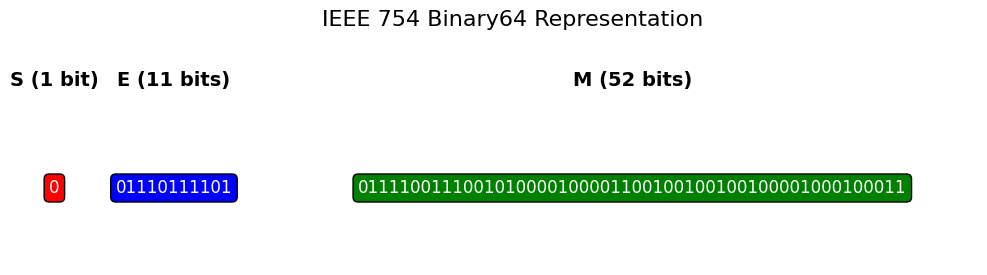

Decinal representation of binary64 0 | 00000000001 | 0000000000000000000000000000000000000000000000000001: 2.225073858507202e-308


In [ ]:
# Binary64 representation of num

##### Enter num in scientific notation to obtain the binary 64 representation
num = 2e-20
binary_representation, binary_str_clean = float_to_binary64(num)
print(f"Binary representation of {num}: {binary_representation}\n")
visualize_binary64(binary_representation)



##### Enter a string of 64 bits to obtain the decinal representation in scientific notation
# Example binary64 string conversions
binary_representation = "0 | 00000000001 | 0000000000000000000000000000000000000000000000000001"
converted_float = binary64_to_float(binary_representation)
print(f"Decinal representation of binary64 {binary_representation}: {converted_float}")


$$
x = (-1)^S \times M  \times 2^E
$$

### **There are minor differences between native python and nompy for `binary64`**



In [21]:
import numpy as np
import sys

print('native python min', sys.float_info.min)
print('native python max', sys.float_info.max)
print('native python epsilon', sys.float_info.epsilon)


print('numpy min:',np.finfo(np.float64).min)  
print('numpy max:',np.finfo(np.float64).max)  
print('numpy epsilon:',np.finfo(np.float64).eps)




native python min 2.2250738585072014e-308
native python max 1.7976931348623157e+308
native python epsilon 2.220446049250313e-16
numpy min: -1.7976931348623157e+308
numpy max: 1.7976931348623157e+308
numpy epsilon: 2.220446049250313e-16


In [10]:
# Test the smallest distinguishable increment from 1.0
import sys
python_epsilon = sys.float_info.epsilon
test_value = 0.3 + python_epsilon 
difference = test_value - 0.3
print(f"Machine epsilon (Python float64): {python_epsilon}")
print(f"Difference (1.0 + epsilon - 1.0): {difference}")

Machine epsilon (Python float64): 2.220446049250313e-16
Difference (1.0 + epsilon - 1.0): 2.220446049250313e-16


### **Examples of rounding errors** 

In [11]:
x = 0.1
sum_x = sum([x] * 10)  # Adding 0.1 ten times
print(sum_x)

0.9999999999999999


In [12]:
print(0.1 + 0.2)

0.30000000000000004


$$ ==========================================================================================

# **2 Euler's Method for Solving Ordinary Differential Equations (ODEs)**

## **2.1. What is Euler’s Method?**
Euler’s method is a **numerical approach** for solving **ordinary differential equations (ODEs)**. Here one example:

$$
\frac{dy}{dx} = f(x, y), \quad y(x_0) = y_0
$$

where:
- $y$ is the unknown function.
- $f(x, y)$ is the **derivative** (rate of change) of $y$ with respect to $x$.
- $(x_0, y_0)$ is the **initial condition**.











Euler's method approximates the solution by iterating over small steps of size \( h \) using the update formula:

$$
y_{n+1} = y_n + h f(x_n, y_n)
$$

where:
- $ y_n $ is the approximation of $ y(x_n) $,
- $ x_{n+1} = x_n + h $,
- $ h $ is the step size.
- initial condition y(0) must be specified 

## Step-by-Step Implementation
1. **Initialize**: Start with the given initial condition $ (x_0, y_0) $.
2. **Iterate**: Compute successive values using the Euler update formula.
3. **Stop** when the desired interval $ [x_0, x_{ext{end}}] $ is reached.

### **Example Calculation**
Solve the ODE:

$$
\frac{dy}{dx} = x + y, \quad y(0) = 1
$$

using Euler's method with step size $ h = 0.1 $ up to $ x = 0.5 $.

#### **Table of Iterations**
| n  | $ x_n $ | $ y_n $ | $ f(x_n, y_n) = x_n + y_n $ | $ y_{n+1} $ |
|----|------|------|------------|------|
| 0  | 0.0  | 1.0  | 1.0        | 1.1  |
| 1  | 0.1  | 1.1  | 1.2        | 1.22 |
| 2  | 0.2  | 1.22 | 1.42       | 1.362 |
| 3  | 0.3  | 1.362 | 1.662      | 1.5282 |
| 4  | 0.4  | 1.5282 | 1.9282     | 1.721 |
| 5  | 0.5  | 1.721 | -         | - |





## **Solution of f(x) = (1 + x)exp(x)**

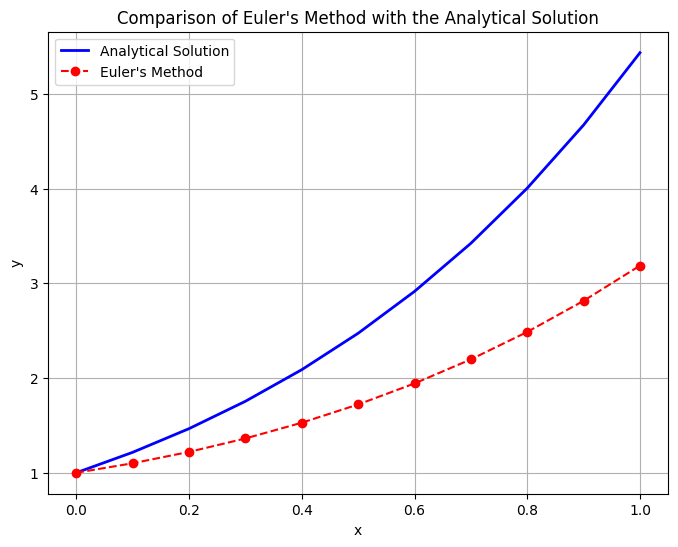

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')  # Ensures a white background
# Define the ODE function dy/dx = f(x, y)
def f(x, y):
    return x + y

# Analytical solution y(x) = (1 + x) * e^x
def analytical_solution(x):
    return (1 + x) * np.exp(x)

####################################################################################################
############################Euler's Method Implementation###########################################

# Euler's Method Implementation
def euler_method(f, x0, y0, h, x_end):
    x_values = np.arange(x0, x_end + h, h)  # Generate x values
    y_values = np.zeros(len(x_values))  # Array to store y values
    y_values[0] = y0  # Initial condition

    for i in range(1, len(x_values)):
        y_values[i] = y_values[i-1] + h * f(x_values[i-1], y_values[i-1])

    return x_values, y_values

####################################################################################################
####################################################################################################

# Parameters
x0, y0 = 0, 1  # Initial condition y(0) = 1
h = 0.1  # Step size
x_end = 1  # Solve until x = 1

# Solve ODE using Euler's Method
x_values, y_euler = euler_method(f, x0, y0, h, x_end)

# Compute the analytical solution
y_exact = analytical_solution(x_values)

# Plot the solutions
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_exact, label="Analytical Solution", linestyle='-', linewidth=2, color='blue')
plt.plot(x_values, y_euler, label="Euler's Method", marker='o', linestyle='--', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Comparison of Euler's Method with the Analytical Solution")
plt.legend()
plt.grid(True)
plt.show()

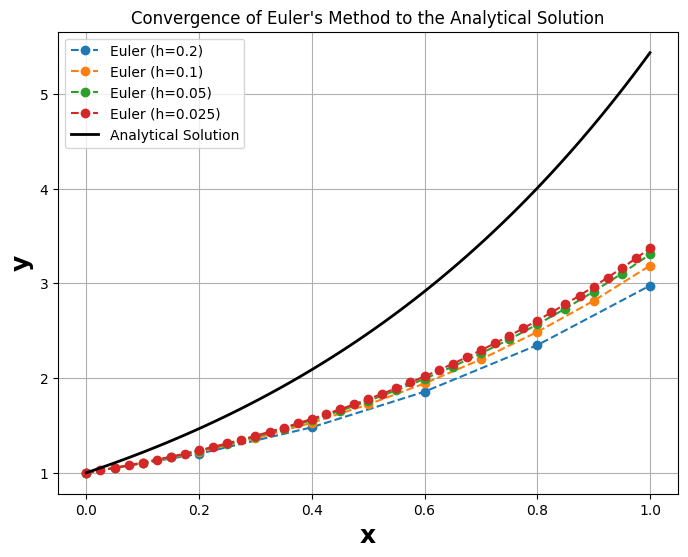

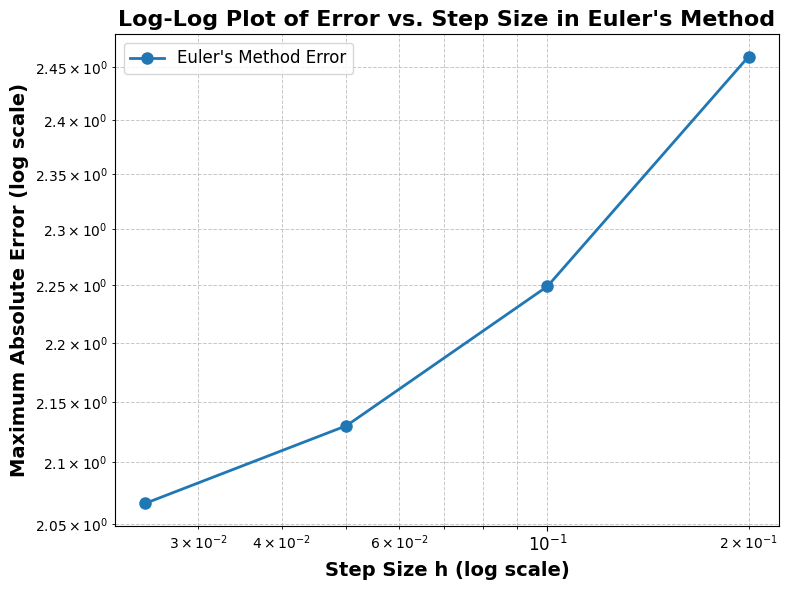

In [8]:
# Re-import necessary libraries after execution state reset
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('default')  # Ensures a white background

# Define the ODE function dy/dx = f(x, y)
def f(x, y):
    return x + y

# Analytical solution y(x) = (1 + x) * e^x
def analytical_solution(x):
    return (1 + x) * np.exp(x)


###################################################################################################
############################Euler's Method Implementation###########################################

# Euler's Method Implementation
def euler_method(f, x0, y0, h, x_end):
    x_values = np.arange(x0, x_end + h, h)  # Generate x values
    y_values = np.zeros(len(x_values))  # Array to store y values
    y_values[0] = y0  # Initial condition

    for i in range(1, len(x_values)):
        y_values[i] = y_values[i-1] + h * f(x_values[i-1], y_values[i-1])

    return x_values, y_values
###################################################################################################
####################################################################################################



# Parameters
x0, y0 = 0, 1  # Initial condition y(0) = 1
x_end = 1  # Solve until x = 1

# Different step sizes to analyze convergence
step_sizes = [0.2, 0.1, 0.05, 0.025]

plt.figure(figsize=(8, 6))

# Plot numerical solutions with different step sizes
for h in step_sizes:
    x_values, y_euler = euler_method(f, x0, y0, h, x_end)
    y_exact = analytical_solution(x_values)
    plt.plot(x_values, y_euler, marker='o', linestyle='--', label=f"Euler (h={h})")

# Plot analytical solution
x_fine = np.linspace(x0, x_end, 100)
y_fine = analytical_solution(x_fine)
plt.plot(x_fine, y_fine, label="Analytical Solution", linestyle='-', linewidth=2, color='black')

# Labels and legend
plt.xlabel('x', fontsize=18, fontweight='bold')
plt.ylabel('y', fontsize=18, fontweight='bold')
plt.title("Convergence of Euler's Method to the Analytical Solution")
plt.legend()
plt.grid(True)
plt.show()

# Compute error as a function of step size h
errors = []

for h in step_sizes:
    x_values, y_euler = euler_method(f, x0, y0, h, x_end)
    y_exact = analytical_solution(x_values)
    max_error = np.max(np.abs(y_euler - y_exact))  # Maximum absolute error for this step size
    errors.append(max_error)

# Convert step sizes and errors to numpy arrays for plotting
h_values = np.array(step_sizes)
errors = np.array(errors)


plt.show()



# Create log-log plot
plt.figure(figsize=(8, 6))  # Set figure size
plt.loglog(h_values, errors, marker='o', linestyle='-', linewidth=2, markersize=8, label="Euler's Method Error")

# Labels and title with larger font sizes
plt.xlabel('Step Size h (log scale)', fontsize=14, fontweight='bold')
plt.ylabel('Maximum Absolute Error (log scale)', fontsize=14, fontweight='bold')
plt.title("Log-Log Plot of Error vs. Step Size in Euler's Method", fontsize=16, fontweight='bold')

# Enlarged tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Improved legend
plt.legend(fontsize=12, loc='upper left', frameon=True)

# Improved grid styling
plt.grid(True, which="both", linestyle="--", linewidth=0.7, alpha=0.7)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

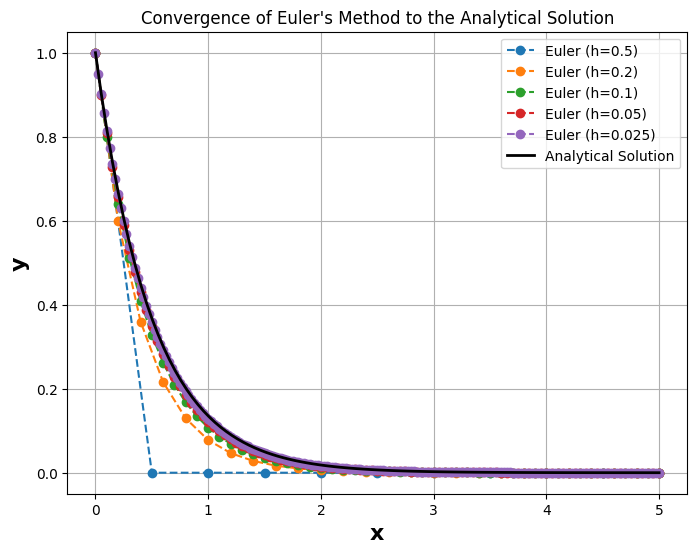

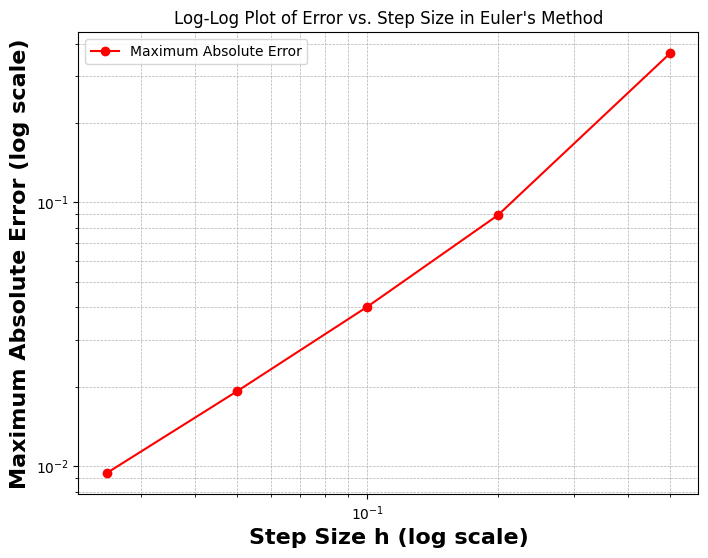

In [10]:
# Define the differential equation dy/dx = f(x, y)
def f(x, y):
    return -2 * y  # Example: Exponential decay

# Euler's method function
def euler_method(f, x0, y0, x_end, h):
    x_values = np.arange(x0, x_end + h, h)  # Generate x values
    y_values = np.zeros(len(x_values))  # Initialize y values
    y_values[0] = y0  # Set initial condition

    # Apply Euler's method
    for i in range(1, len(x_values)):
        y_values[i] = y_values[i-1] + h * f(x_values[i-1], y_values[i-1])

    return x_values, y_values

# Parameters
x0 = 0        # Initial x
y0 = 1        # Initial y
x_end = 5     # Final x

# Different step sizes to analyze convergence
step_sizes = [0.5, 0.2, 0.1, 0.05, 0.025]

plt.figure(figsize=(8, 6))

# Plot numerical solutions with different step sizes
for h in step_sizes:
    x_values, y_euler = euler_method(f, x0, y0, x_end, h)
    y_exact = y0 * np.exp(-2 * x_values)
    plt.plot(x_values, y_euler, marker='o', linestyle='--', label=f"Euler (h={h})")

# Plot analytical solution
x_fine = np.linspace(x0, x_end, 100)
y_fine = y0 * np.exp(-2 * x_fine)
plt.plot(x_fine, y_fine, label="Analytical Solution", linestyle='-', linewidth=2, color='black')

# Labels and legend
plt.xlabel('x',fontsize=16, fontweight='bold')
plt.ylabel('y',fontsize=16, fontweight='bold')
plt.title("Convergence of Euler's Method to the Analytical Solution")
plt.legend()
plt.grid(True)
plt.show()

# Compute and plot error as a function of step size h
errors = []

for h in step_sizes:
    x_values, y_euler = euler_method(f, x0, y0, x_end, h)
    y_exact = y0 * np.exp(-2 * x_values)
    max_error = np.max(np.abs(y_euler - y_exact))  # Maximum absolute error for this step size
    errors.append(max_error)

# Convert step sizes and errors to numpy arrays for plotting
h_values = np.array(step_sizes)
errors = np.array(errors)

# Plot error as a function of step size h in a log-log plot
plt.figure(figsize=(8, 6))
plt.loglog(h_values, errors, marker='o', linestyle='-', color='red', label="Maximum Absolute Error")

# Labels and legend
plt.xlabel('Step Size h (log scale)',fontsize=16, fontweight='bold')
plt.ylabel('Maximum Absolute Error (log scale)',fontsize=16, fontweight='bold')
plt.title("Log-Log Plot of Error vs. Step Size in Euler's Method")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.show()

# Solving Projectile Motion Using Euler's Method

## Introduction
Projectile motion can be described using a system of second-order differential equations. Euler's method provides a numerical approach to solving these equations step by step.

## Governing Equations
The motion of a projectile under the influence of gravity (neglecting air resistance) is described by the following second-order differential equations:

- **Horizontal Motion (No Acceleration)**:
  $$ \frac{d^2 x}{dt^2} = 0 $$
  which implies constant velocity:
  $$ \frac{dx}{dt} = v_x = v_{0x} $$

- **Vertical Motion (Acceleration Due to Gravity)**:
  $$ \frac{d^2 y}{dt^2} = -g $$
  which describes uniformly accelerated motion.

By integrating these equations:
- Horizontal position:
  $$ x(t) = x_0 + v_{0x} t $$
- Vertical velocity:
  $$ v_y = v_{0y} - g t $$
- Vertical position:
  $$ y(t) = y_0 + v_{0y} t - \frac{1}{2} g t^2 $$

## Euler's Method Algorithm
Euler's method approximates the solution iteratively using:

$$ y_{n+1} = y_n + h f(y_n) $$

where $h$ is the time step. Applying this to projectile motion:

1. Choose initial conditions:
   - $x_0, y_0$ (initial position)
   - $v_{x0}, v_{y0}$ (initial velocity components)
   - Time step $h$

2. Convert second-order ODEs into first-order ODEs:
   - Define velocity components: $ v_x = \frac{dx}{dt} $, $ v_y = \frac{dy}{dt} $.
   - Define acceleration: $ a_x = 0 $, $ a_y = -g $.

3. Iterate using:
   $$ x_{n+1} = x_n + h v_{x_n} $$
   $$ v_{x_{n+1}} = v_{x_n} $$
   $$ y_{n+1} = y_n + h v_{y_n} $$
   $$ v_{y_{n+1}} = v_{y_n} - h g $$

4. At each step $n$, the projectile's position is given by the coordinate pair:
   $$ (x_n, y_n) $$

5. Repeat until $y_n \leq 0$ (projectile hits the ground).

## Implementation Outline
1. Define parameters: $g, h, x_0, y_0, v_{x0}, v_{y0}$.
2. Initialize lists for position and velocity.
3. Use a loop to update values using Euler's equations.
4. Stop when the projectile reaches the ground.
5. Plot $x$ vs. $y$ to visualize the trajectory.

## Conclusion
Projectile motion is fundamentally governed by second-order ODEs. However, for numerical implementation, these equations are converted into a system of first-order ODEs. Euler's method provides a straightforward way to approximate the trajectory, though more accurate methods such as Runge-Kutta can improve precision. By choosing a sufficiently small time step $h$, we can achieve a high degree of accuracy in predicting the trajectory.


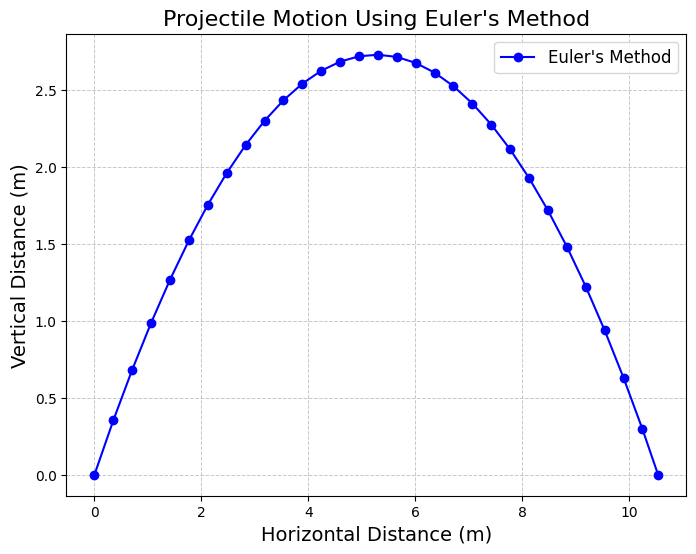

In [101]:
import numpy as np
import matplotlib.pyplot as plt

# Define the projectile motion parameters
g = 9.81  # Acceleration due to gravity (m/s^2)
h = 0.05  # Time step (s)

# Initial conditions
x0, y0 = 0.0, 0.0  # Initial position (m)
v0 = 10.0  # Initial velocity (m/s)
theta = 45.0  # Launch angle (degrees)
vx0 = v0 * np.cos(np.radians(theta))  # Initial horizontal velocity
vy0 = v0 * np.sin(np.radians(theta))  # Initial vertical velocity

# Lists to store results
x_values = [x0]
y_values = [y0]
t_values = [0]  # Store time values
vx, vy = vx0, vy0
x, y = x0, y0

##################################################################################
################################ Euler's Method Iteration ########################
# Euler's Method Iteration
t = 0.0
while y >= 0:  # Stop when the projectile hits the ground
    x_new = x + h * vx
    y_new = y + h * vy
    vx_new = vx  # No horizontal acceleration
    vy_new = vy - h * g  # Update vertical velocity due to gravity

    # Stop exactly at the ground using linear interpolation
    if y_new < 0:
        alpha = y / (y - y_new)  # Interpolation factor
        x_final = x + alpha * (x_new - x)  # Adjusted x position at ground hit
        y_final = 0  # Ensure projectile lands exactly on the ground
        t_final = t + alpha * h  # Adjusted final time
        
        x_values.append(x_final)
        y_values.append(y_final)
        t_values.append(t_final)
        break

    # Update values
    x, y, vx, vy = x_new, y_new, vx_new, vy_new
    x_values.append(x)
    y_values.append(y)
    t += h
    t_values.append(t)

##################################################################################
##################################################################################

# Convert lists to numpy arrays for better performance
x_values = np.array(x_values)
y_values = np.array(y_values)
t_values = np.array(t_values)

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, marker='o', linestyle='-', color='b', label="Euler's Method")

# Labels and title
plt.xlabel("Horizontal Distance (m)", fontsize=14)
plt.ylabel("Vertical Distance (m)", fontsize=14)
plt.title("Projectile Motion Using Euler's Method", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True, linestyle="--", linewidth=0.7, alpha=0.7)

# Show plot
plt.show()